### Tinder EDA - Vidhi Agrawal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Reading the data

In [2]:
df_tinder= pd.read_csv('data_challenge_dataset.csv')

In [3]:
df_tinder.head()

,member_id,day,age,country,gender,device_type,is_active_user,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received
0,1,2020-01-01,23,Argentina,Female,android,0,0,31,0,20,0,0,0
1,1,2020-01-02,23,Argentina,Female,android,0,0,9,0,6,0,0,0
2,1,2020-01-03,23,Argentina,Female,android,0,0,4,0,3,0,0,0
3,1,2020-01-04,23,Argentina,Female,android,0,0,2,0,1,0,0,0
4,1,2020-01-05,23,Argentina,Female,android,1,200,153,8,98,3,4,5


#### Descriptive Statistics

In [4]:
df_tinder.describe()

,member_id,age,is_active_user,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received
count,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000,35780.000000
mean,1102.897513,27.315064,0.600531,63.990330,87.023924,9.865651,23.841280,1.421632,6.286669,6.680296
std,634.431882,7.194695,0.489796,172.800707,215.852714,25.427923,89.581211,4.555392,28.392374,28.326291
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,558.000000,22.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1092.000000,26.000000,1.000000,2.000000,29.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,1664.000000,31.000000,1.000000,53.000000,69.000000,7.000000,13.000000,1.000000,2.000000,2.000000
max,2198.000000,114.000000,1.000000,5174.000000,4621.000000,922.000000,2635.000000,192.000000,1646.000000,1084.000000


In [5]:
df_tinder[df_tinder['age']>70]['member_id'].unique()

array([ 497,  663, 1014, 1555])

There are a few users with high age brackets. It depends on the business constraint if we choose to drop them.

In [6]:
df_tinder.shape

(35780, 14)

The data consists of 35780 active/in-active user activity records and 14 columns consisting of member demographics and engagement data

In [7]:
df_tinder['member_id'].nunique()

2198

The data is for 2198 unique users

In [8]:
df_tinder['day'] = pd.to_datetime(df_tinder['day'])
min_date = df_tinder['day'].min()
max_date = df_tinder['day'].max()
print(f"Time range: {min_date} to {max_date}")

Time range: 2020-01-01 00:00:00 to 2020-01-31 00:00:00


The data is given for the whole first month of January in 2020

In [9]:
df_tinder.isnull().sum()

member_id            0
day                  0
age                  0
country              0
gender               0
device_type          0
is_active_user       0
swipes_sent          0
swipes_received      0
likes_sent           0
likes_received       0
matches              0
messages_sent        0
messages_received    0
dtype: int64

In [10]:
duplicates = df_tinder.duplicated(keep=False)
print(df_tinder[duplicates])

Empty DataFrame
Columns: [member_id, day, age, country, gender, device_type, is_active_user, swipes_sent, swipes_received, likes_sent, likes_received, matches, messages_sent, messages_received]
Index: []


There are no missing values and duplicates in the data

### Analysing active users activity

In [11]:
df_tinder_active=df_tinder[df_tinder['is_active_user']==1]

#### Distribution of User Active Days

/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/2015481801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinder_active['active_days'] = df_tinder_active.groupby('member_id')['day'].transform('nunique')


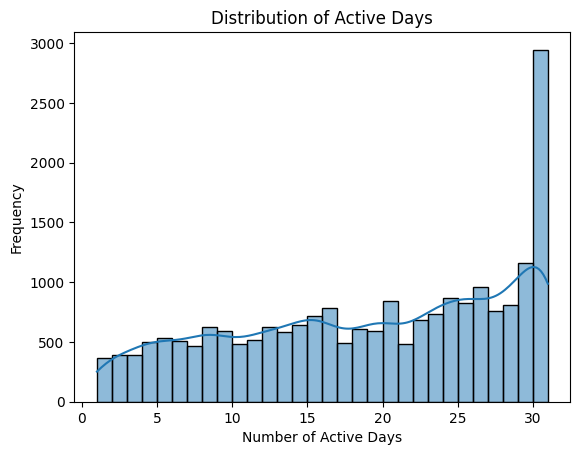

In [12]:
df_tinder_active['active_days'] = df_tinder_active.groupby('member_id')['day'].transform('nunique')
sns.histplot(df_tinder_active['active_days'].dropna(), kde=True, bins=30)  # KDE plot adds a smooth curve at the top of the bars
plt.title('Distribution of Active Days')
plt.xlabel('Number of Active Days')
plt.ylabel('Frequency')
plt.show()

Number of days members were active on Tinder during the month of January. A lot of users were active almost every single day

#### Members and their residing countries

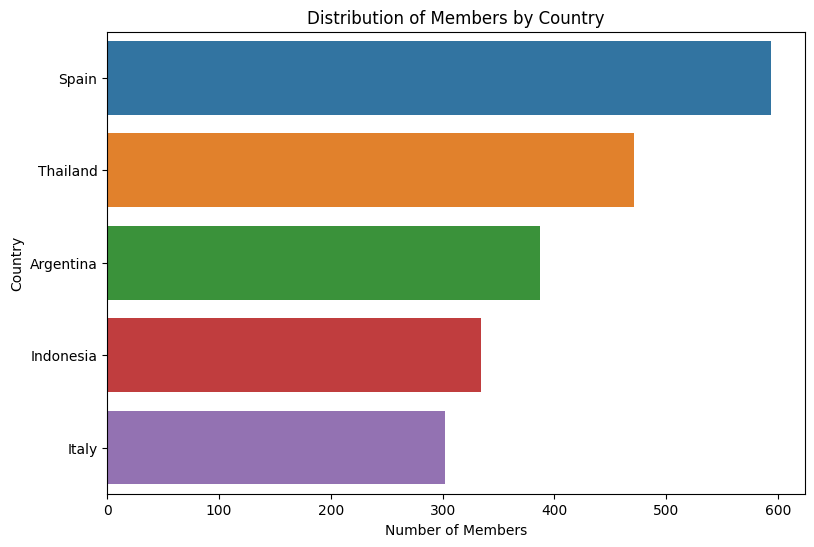

In [13]:
country_distribution = df_tinder_active.groupby('country')['member_id'].nunique().reset_index(name='member_count')
# print(country_distribution)
plt.figure(figsize=(9, 6))
sns.barplot(data=country_distribution.sort_values(by='member_count', ascending=False), x='member_count', y='country')
plt.title('Distribution of Members by Country')
plt.xlabel('Number of Members')
plt.ylabel('Country')
plt.show()

This graph shows the residing locations of members

#### Gender based distribution of data

In [14]:
def gender_distribution(df):
    # Prepare data for the pie chart
    labels = df['gender']
    sizes = df['member_count']
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Members by Gender')
    plt.show()

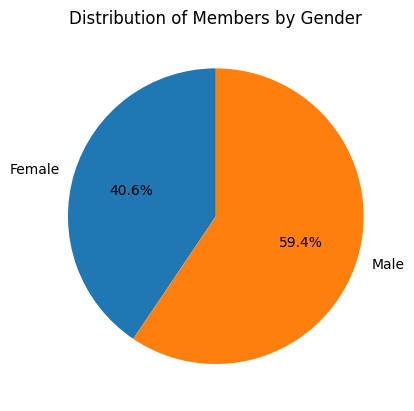

In [15]:
gender_distribution_df_active = df_tinder_active.groupby('gender')['member_id'].nunique().reset_index(name='member_count')
gender_distribution(gender_distribution_df_active)

#### Device-Type based distribution of data

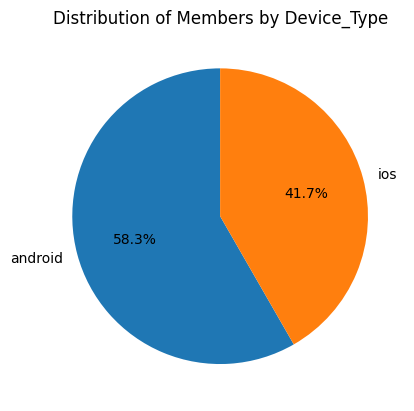

In [16]:
device_distribution = df_tinder.groupby('device_type')['member_id'].nunique().reset_index(name='member_count')
# print(device_distribution )

# Prepare data for the pie chart
labels =device_distribution['device_type']
sizes = device_distribution ['member_count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Members by Device_Type')
plt.show()

#### Age distribution of active users

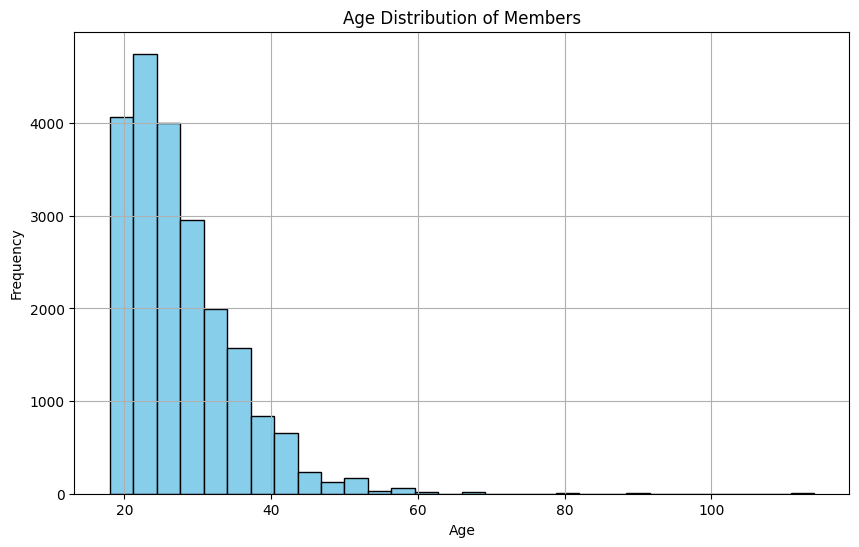

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_tinder_active['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Members')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Relationship between engagement attributes like sent- swipes, likes, matches with Device_Type

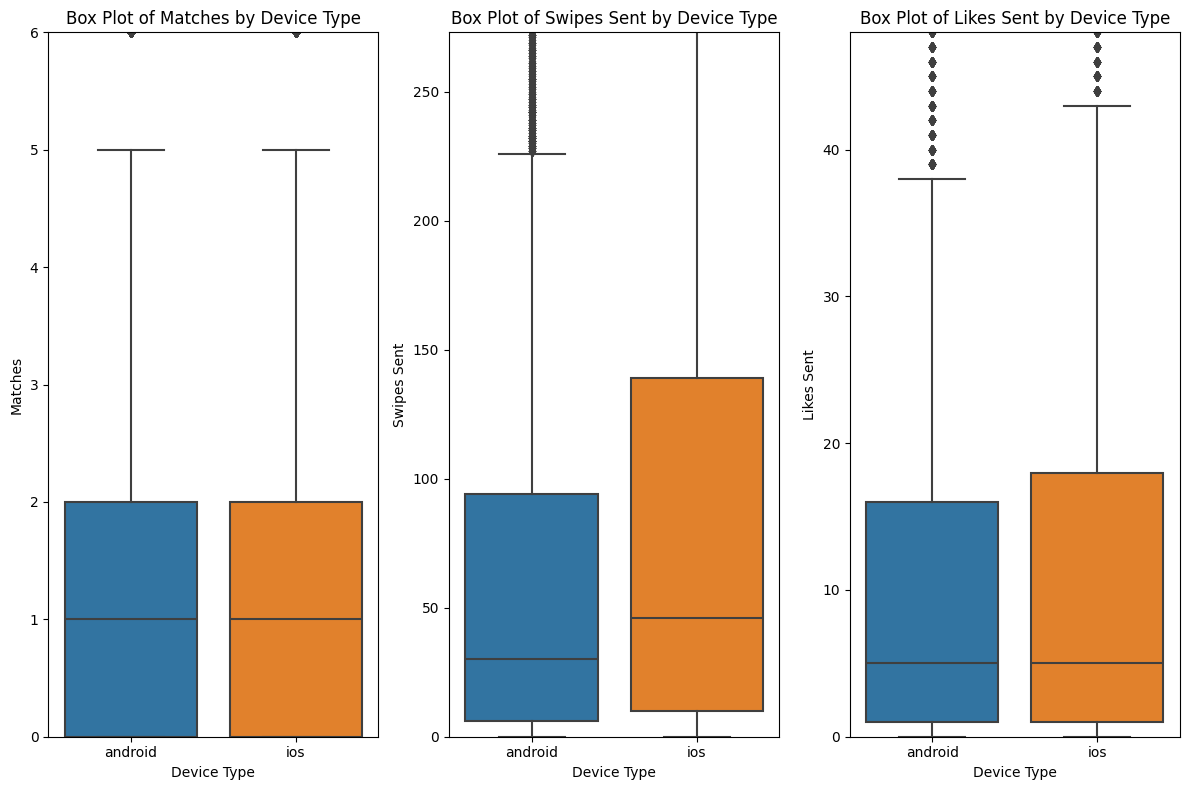

In [18]:
# Create a figure with multiple subplots
plt.figure(figsize=(12, 8))

# Plot for Matches
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x='device_type', y='matches', data=df_tinder_active)
plt.title('Box Plot of Matches by Device Type')
plt.ylabel('Matches')
plt.xlabel('Device Type')
matches_limits = df_tinder_active['matches'].quantile([0.05, 0.9]).values
plt.ylim(matches_limits)

# Plot for Swipes Sent
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x='device_type', y='swipes_sent', data=df_tinder_active)
plt.title('Box Plot of Swipes Sent by Device Type')
plt.ylabel('Swipes Sent')
plt.xlabel('Device Type')
matches_limits = df_tinder_active['swipes_sent'].quantile([0.05, 0.9]).values
plt.ylim(matches_limits)

# Plot for Likes Sent
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x='device_type', y='likes_sent', data=df_tinder_active)
plt.title('Box Plot of Likes Sent by Device Type')
plt.ylabel('Likes Sent')
plt.xlabel('Device Type')
matches_limits = df_tinder_active['likes_sent'].quantile([0.05, 0.9]).values
plt.ylim(matches_limits)

plt.tight_layout()
plt.show()

Though the number of likes, matches are bear no difference basedon device_type but ee can observe that ios users have a higher tendency to swipe more

#### Relationship between engagement attributes like sent- swipes, likes, matches with Gender

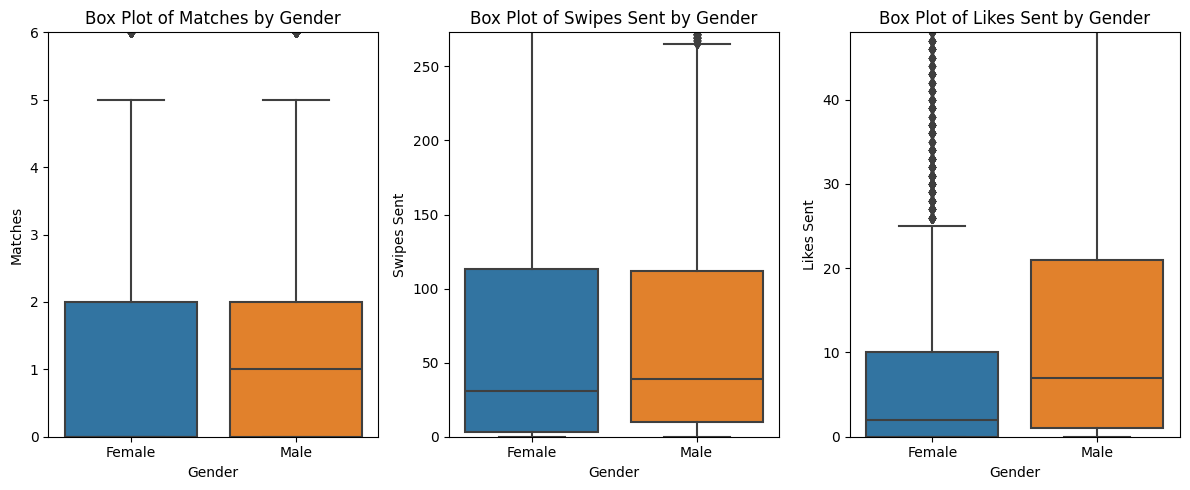

In [19]:
# Create a figure with multiple subplots
plt.figure(figsize=(12, 5))

# Plot for Matches
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x='gender', y='matches', data=df_tinder_active)
plt.title('Box Plot of Matches by Gender')
plt.ylabel('Matches')
plt.xlabel('Gender')
matches_limits = df_tinder_active['matches'].quantile([0, 0.9]).values
plt.ylim(matches_limits)


# Plot for Swipes Sent
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x='gender', y='swipes_sent', data=df_tinder_active)
plt.title('Box Plot of Swipes Sent by Gender')
plt.ylabel('Swipes Sent')
plt.xlabel('Gender')
matches_limits = df_tinder_active['swipes_sent'].quantile([0.05, 0.9]).values
plt.ylim(matches_limits)
# Plot for Likes Sent
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x='gender', y='likes_sent', data=df_tinder_active)
plt.title('Box Plot of Likes Sent by Gender')
plt.ylabel('Likes Sent')
plt.xlabel('Gender')

matches_limits = df_tinder_active['likes_sent'].quantile([0.005, 0.9]).values
plt.ylim(matches_limits)

plt.tight_layout()
plt.show()

### Differences, Similarities on user actions based on country

#### Weekly Trend of total matches across countries

/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/2843218742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinder_active['day'] = pd.to_datetime(df_tinder_active['day'])
/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/2843218742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinder_active['week_of_year'] = df_tinder_active['day'].dt.isocalendar().week


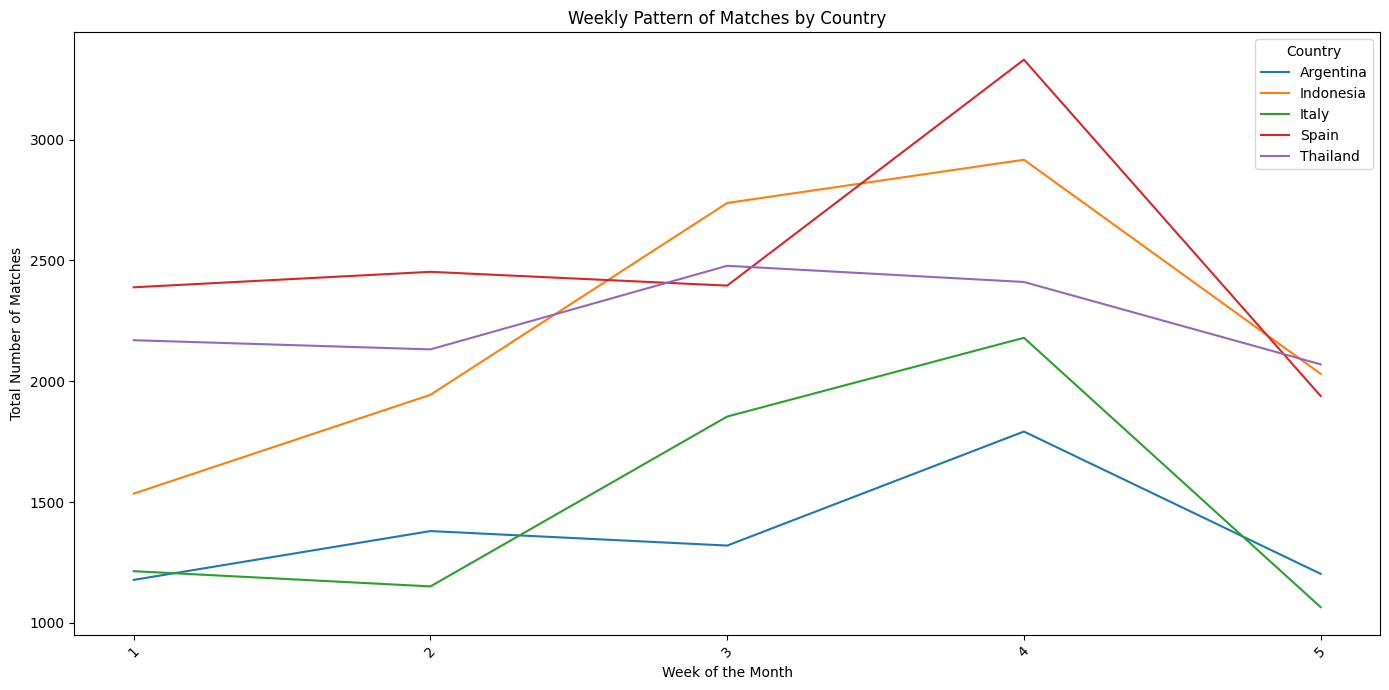

In [20]:
# Assuming df_tinder_active is already loaded and contains 'date' and 'country' columns
df_tinder_active['day'] = pd.to_datetime(df_tinder_active['day'])
df_tinder_active['week_of_year'] = df_tinder_active['day'].dt.isocalendar().week

weekly_matches = df_tinder_active.groupby(['country', 'week_of_year'])['matches'].sum().reset_index()
# Convert week_of_year to string if it's not already, to avoid issues with seaborn interpreting it as continuous data
weekly_matches['week_of_year'] = weekly_matches['week_of_year'].astype(str)

# Ensure that the 'matches' column is numeric
weekly_matches['matches'] = pd.to_numeric(weekly_matches['matches'], errors='coerce')

# Drop any rows that have NaN values after the conversion
weekly_matches = weekly_matches.dropna(subset=['matches'])

# Now let's try plotting again
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_matches, x='week_of_year', y='matches', hue='country')
plt.title('Weekly Pattern of Matches by Country')
plt.xlabel('Week of the Month')
plt.ylabel('Total Number of Matches')
plt.legend(title='Country', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Average matches per person

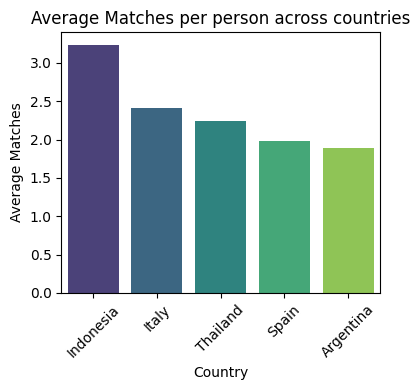

In [21]:
# Group by country and calculate the average number of matches
avg_matches_by_country = df_tinder_active.groupby('country')['matches'].mean().reset_index()

# Sort the data for better visualization
avg_matches_by_country_sorted = avg_matches_by_country.sort_values('matches', ascending=False)

# Plotting
plt.figure(figsize=(4, 4))
sns.barplot(x='country', y='matches', data=avg_matches_by_country_sorted, palette='viridis')
plt.title('Average Matches per person across countries')
plt.xlabel('Country')
plt.ylabel('Average Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
df_tinder_active.head()

,member_id,day,age,country,gender,device_type,is_active_user,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received,active_days,week_of_year
4,1,2020-01-05,23,Argentina,Female,android,1,200,153,8,98,3,4,5,5,1
8,1,2020-01-09,23,Argentina,Female,android,1,47,67,4,48,3,1,5,5,2
13,1,2020-01-14,23,Argentina,Female,android,1,21,89,0,61,0,6,0,5,3
18,1,2020-01-19,23,Argentina,Female,android,1,351,69,17,41,6,22,26,5,3
19,1,2020-01-20,23,Argentina,Female,android,1,0,78,0,43,2,2,6,5,4


In [23]:
member_countries = df_tinder.groupby('member_id')['country'].nunique()
members_multiple_countries = member_countries[member_countries > 1]
print(members_multiple_countries)

member_id
136     2
714     2
785     2
909     2
967     2
1172    2
1186    2
1187    2
1352    2
1418    2
1481    2
1832    2
1932    2
2080    2
2171    2
Name: country, dtype: int64


A few users have swipped from multiple countries

#### Analysis on aggregated active_users data (considering average values)

In [24]:
aggregated_data = df_tinder_active.groupby('country').agg({
    'member_id': 'nunique',
    'swipes_sent': 'mean',
    'swipes_received': 'mean',
    'likes_sent': 'mean',
    'likes_received': 'mean',
    'matches': 'mean',
    'messages_sent': 'mean',
    'messages_received': 'mean'
}).rename(columns={'member_id': 'unique_member_count'}).reset_index()

In [25]:
aggregated_data

,country,unique_member_count,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received
0,Argentina,387,102.625655,120.663724,13.424828,39.880552,1.896000,9.104552,9.273103
1,Indonesia,334,97.129640,113.158353,18.051334,25.924594,3.238109,12.853248,13.270882
2,Italy,302,106.123181,150.147753,16.813450,58.107339,2.413191,8.967992,10.461041
3,Spain,594,98.132285,121.006035,15.047642,34.858345,1.986343,11.015563,11.333333
4,Thailand,471,126.166600,109.167795,18.906847,18.755374,2.241441,10.034634,10.481091


#### Heatnap of User Interactions by Country

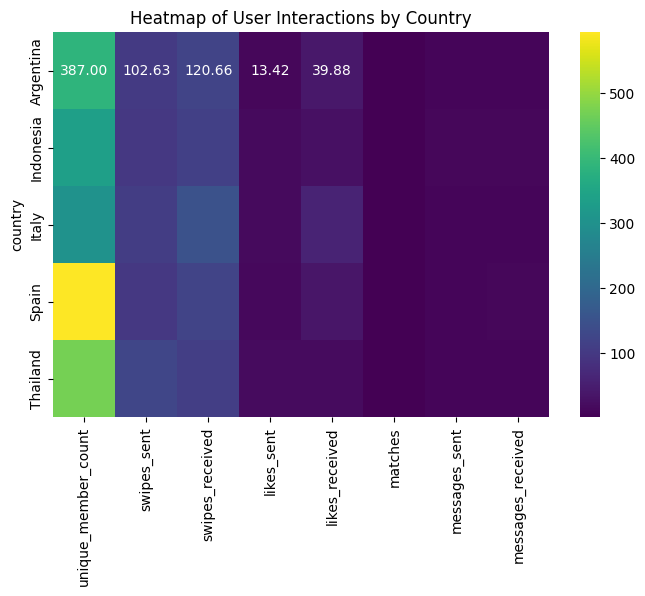

In [26]:
plt.figure(figsize=(8, 5))
sns.heatmap(aggregated_data.set_index('country'), annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of User Interactions by Country')
plt.show()

#### Comparing User Actions across countries

In [27]:
def plot_interaction_comparison(data, metric1, metric2, title):
    plt.figure(figsize=(6, 3))
    # Melting the DataFrame for easier plotting
    melted_data = data.melt(id_vars=['country'], value_vars=[metric1, metric2])
    sns.barplot(x='country', y='value', hue='variable', data=melted_data)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate country labels for better visibility
    plt.ylabel('Average Count')
    plt.xlabel('Country')
    plt.legend(title='Metric')
    plt.show()

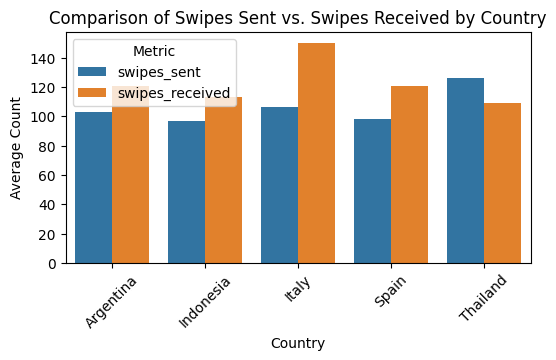

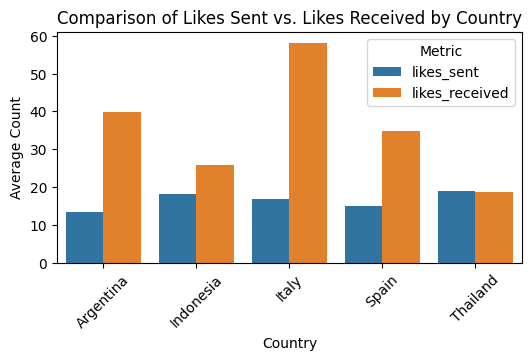

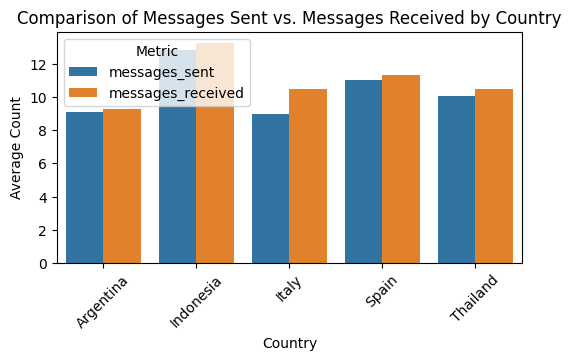

In [28]:
plot_interaction_comparison(aggregated_data, 'swipes_sent', 'swipes_received', 'Comparison of Swipes Sent vs. Swipes Received by Country')
plot_interaction_comparison(aggregated_data, 'likes_sent', 'likes_received', 'Comparison of Likes Sent vs. Likes Received by Country')
plot_interaction_comparison(aggregated_data, 'messages_sent', 'messages_received', 'Comparison of Messages Sent vs. Messages Received by Country')

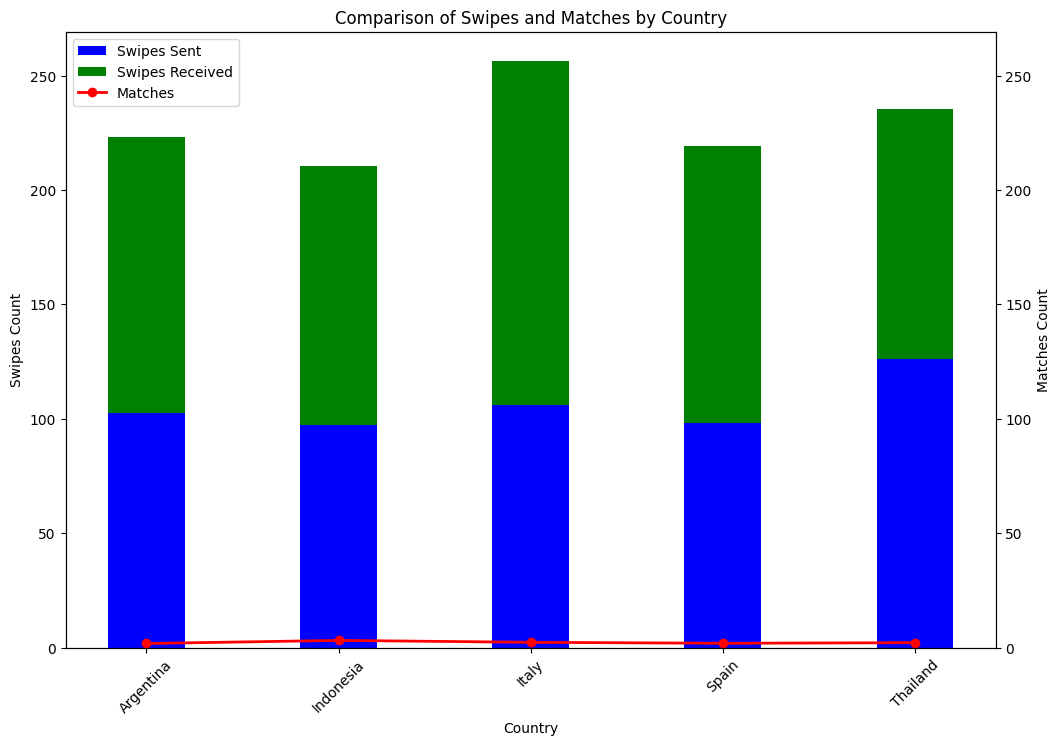

In [29]:
def plot_swipes_and_matches_with_line(data):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Bar plot for swipes
    bars1 = ax1.bar(data['country'], data['swipes_sent'], color='blue', label='Swipes Sent', width=0.4, align='center')
    bars2 = ax1.bar(data['country'], data['swipes_received'], bottom=data['swipes_sent'], color='green', label='Swipes Received', width=0.4, align='center')
    ax1.set_ylabel('Swipes Count')
    ax1.set_xlabel('Country')
    ax1.set_title('Comparison of Swipes and Matches by Country')
    ax1.set_xticks(range(len(data['country'])))
    ax1.set_xticklabels(data['country'], rotation=45)

    # Secondary y-axis for matches
    ax2 = ax1.twinx()
    ax2.plot(data['country'], data['matches'], 'o-', color='red', label='Matches', linewidth=2, markersize=6)
    ax2.set_ylabel('Matches Count')

    # Synchronize y-axes
    y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
    ax1.set_ylim(0, y_max)
    ax2.set_ylim(0, y_max)

    # Add legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()
plot_swipes_and_matches_with_line(aggregated_data)

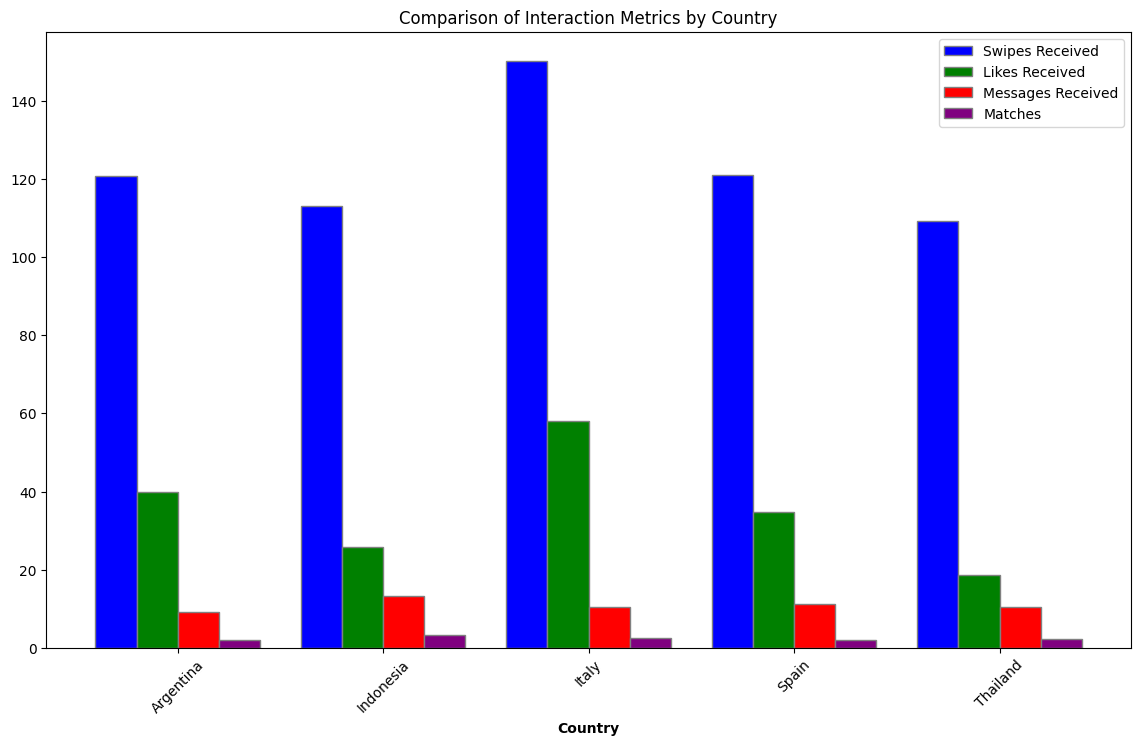

In [30]:
def plot_interaction_metrics(data):
    # Set the size of the plot
    plt.figure(figsize=(14, 8))

    # Set the positions for the bars
    barWidth = 0.2
    r1 = range(len(data))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # Create the bars
    plt.bar(r1, data['swipes_received'], color='blue', width=barWidth, edgecolor='grey', label='Swipes Received')
    plt.bar(r2, data['likes_received'], color='green', width=barWidth, edgecolor='grey', label='Likes Received')
    plt.bar(r3, data['messages_received'], color='red', width=barWidth, edgecolor='grey', label='Messages Received')
    plt.bar(r4, data['matches'], color='purple', width=barWidth, edgecolor='grey', label='Matches')

    # Add xticks on the middle of the group bars
    plt.xlabel('Country', fontweight='bold')
    plt.xticks([r + barWidth*1.5 for r in range(len(data))], data['country'], rotation=45)

    # Create legend & Show graphic
    plt.legend()
    plt.title('Comparison of Interaction Metrics by Country')
    plt.show()
plot_interaction_metrics(aggregated_data)

#### Creating new engagement metrics

/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/2747059811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinder_active['matches_per_swipe_sent'] = df_tinder_active['matches'] / df_tinder_active['swipes_sent'].replace(0, np.nan)
/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/2747059811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinder_active['matches_per_swipe_received'] = df_tinder_active['matches'] / df_tinder_active['swipes_received'].replace(0, np.n

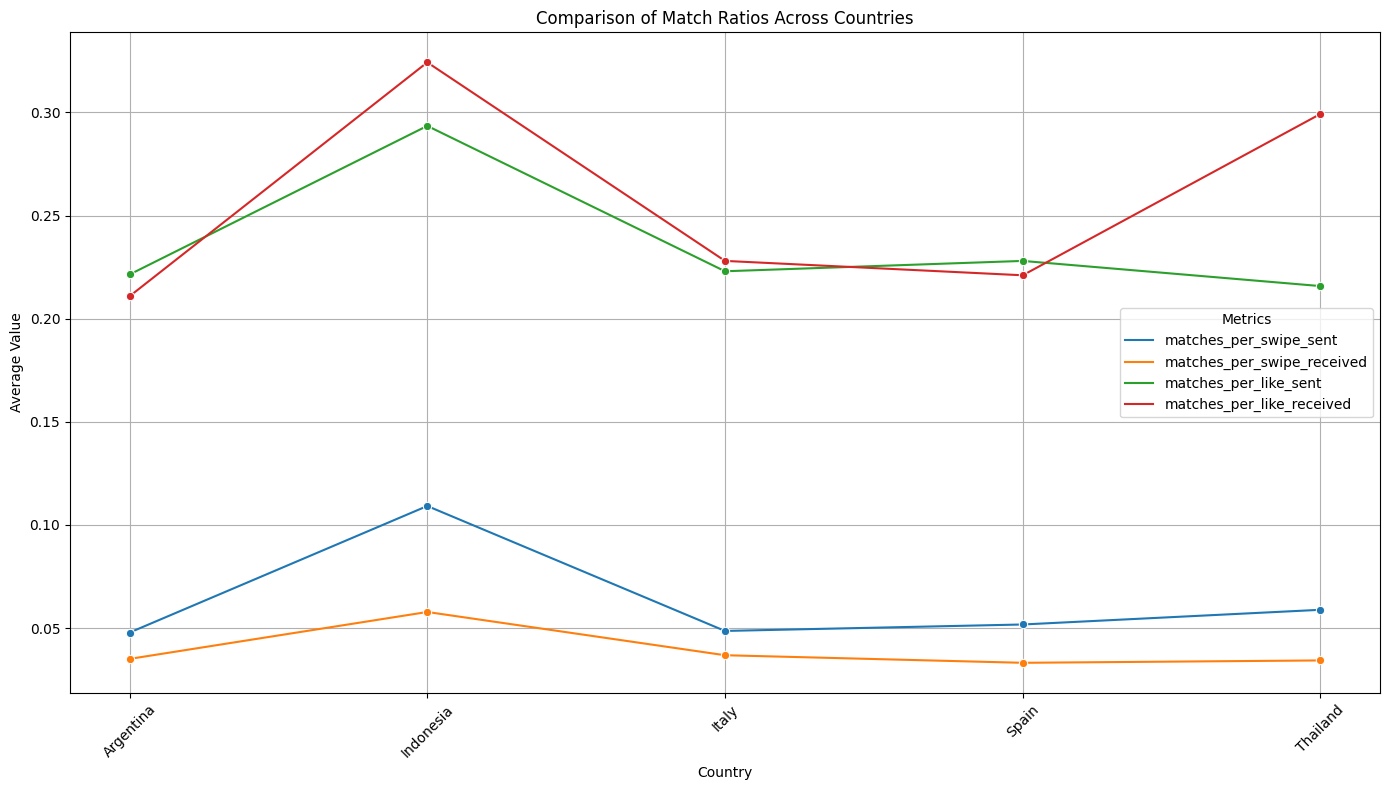

In [31]:
# Calculating new metrics
df_tinder_active['matches_per_swipe_sent'] = df_tinder_active['matches'] / df_tinder_active['swipes_sent'].replace(0, np.nan)
df_tinder_active['matches_per_swipe_received'] = df_tinder_active['matches'] / df_tinder_active['swipes_received'].replace(0, np.nan)
df_tinder_active['matches_per_like_sent'] = df_tinder_active['matches'] / df_tinder_active['likes_sent'].replace(0, np.nan)
df_tinder_active['matches_per_like_received'] = df_tinder_active['matches'] / df_tinder_active['likes_received'].replace(0, np.nan)

country_metrics = df_tinder_active.groupby('country').agg({
    'matches_per_swipe_sent': 'mean',
    'matches_per_swipe_received': 'mean',
    'matches_per_like_sent': 'mean',
    'matches_per_like_received': 'mean'
}).reset_index()

country_metrics_melted = country_metrics.melt(id_vars='country', var_name='metric', value_name='value')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_metrics_melted, x='country', y='value', hue='metric', marker='o')
plt.title('Comparison of Match Ratios Across Countries')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plotting the same engagement metrics with gender comparision

/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/616833004.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_data['country'], rotation=45)
/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/616833004.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_data['country'], rotation=45)
/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/616833004.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_data['country'], rotation=45)
/var/folders/k3/5h101nrx0md1yyv2zt2wwzqm0000gn/T/ipykernel_26583/616833004.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

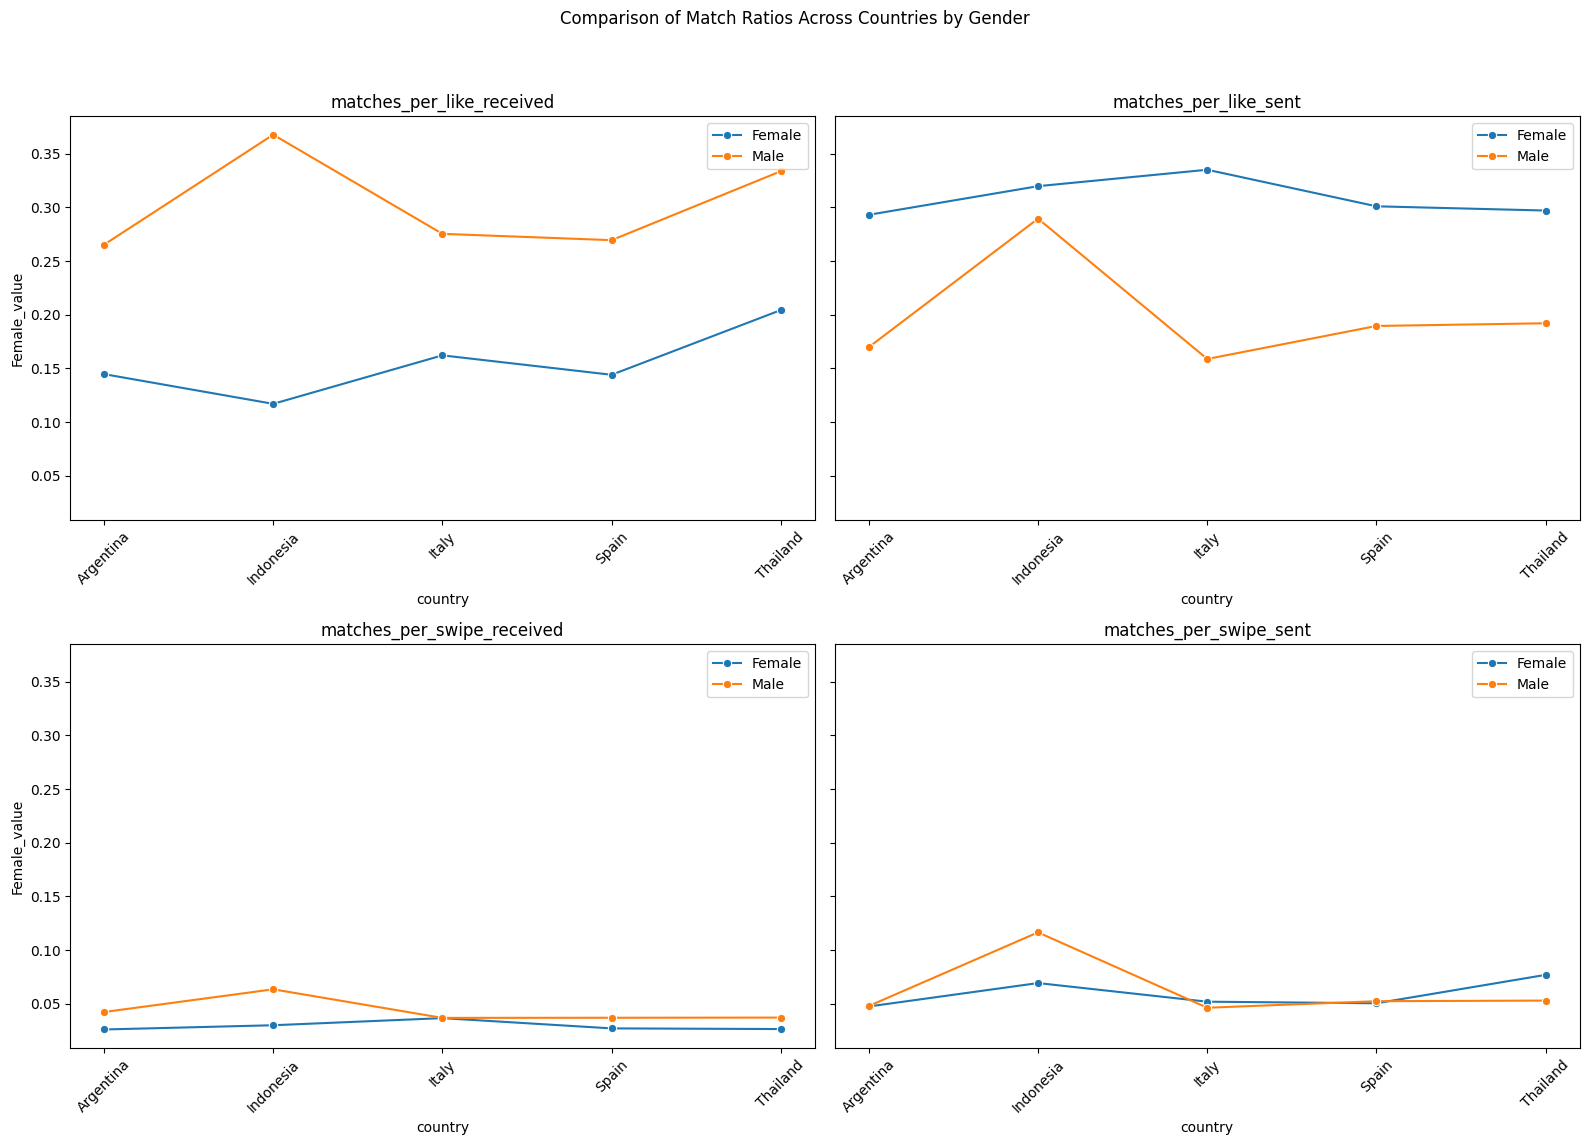

In [32]:
metrics = ['matches_per_swipe_sent', 'matches_per_swipe_received', 'matches_per_like_sent', 'matches_per_like_received']
gender_metrics = {}

for gender in ['Female', 'Male']:
    gender_data = df_tinder_active[df_tinder_active['gender'] == gender]
    gender_metrics[gender] = gender_data.groupby('country').agg({metric: 'mean' for metric in metrics}).reset_index()

# Now, we need to melt these DataFrames and merge them for plotting
melted_data = {}
for gender in ['Female', 'Male']:
    melted_data[gender] = gender_metrics[gender].melt(id_vars='country', var_name='metric', value_name=f'{gender}_value')

# Merge the melted DataFrames for females and males
merged_metrics = pd.merge(melted_data['Female'], melted_data['Male'], on=['country', 'metric'])

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)  # Sharey to have comparable y-axes
axes = axes.flatten()  # Flatten to easily iterate over
for ax, (metric, group_data) in zip(axes, merged_metrics.groupby('metric')):
    sns.lineplot(data=group_data, x='country', y=f'Female_value', marker='o', label='Female', ax=ax)
    sns.lineplot(data=group_data, x='country', y=f'Male_value', marker='o', label='Male', ax=ax)
    ax.set_title(metric)
    ax.set_xticklabels(group_data['country'], rotation=45)
    ax.legend()

# Set common titles and labels
fig.suptitle('Comparison of Match Ratios Across Countries by Gender')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()

#### Gender Ratio across countries

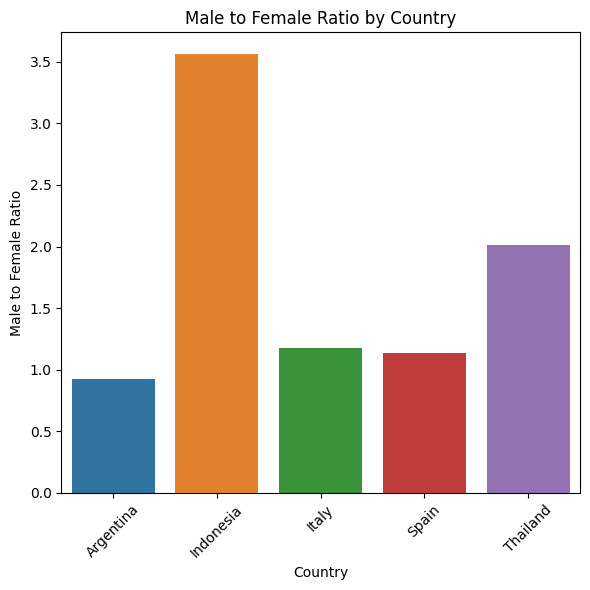

In [33]:
df_unique_members = df_tinder_active.drop_duplicates(subset='member_id')

# Count the number of males and females in each country
gender_distribution = df_unique_members.groupby(['country', 'gender'])['member_id'].count().unstack()

# Calculate the male-to-female ratio
gender_distribution['male_to_female_ratio'] = gender_distribution['Male'] / gender_distribution['Female']

# Reset index to turn the countries into a column again for plotting
gender_distribution.reset_index(inplace=True)

# Create a bar plot of the male to female ratio by country
plt.figure(figsize=(6, 6))
sns.barplot(x='country', y='male_to_female_ratio', data=gender_distribution)
plt.title('Male to Female Ratio by Country')
plt.xlabel('Country')
plt.ylabel('Male to Female Ratio')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

#### Age Distribution of active users by country

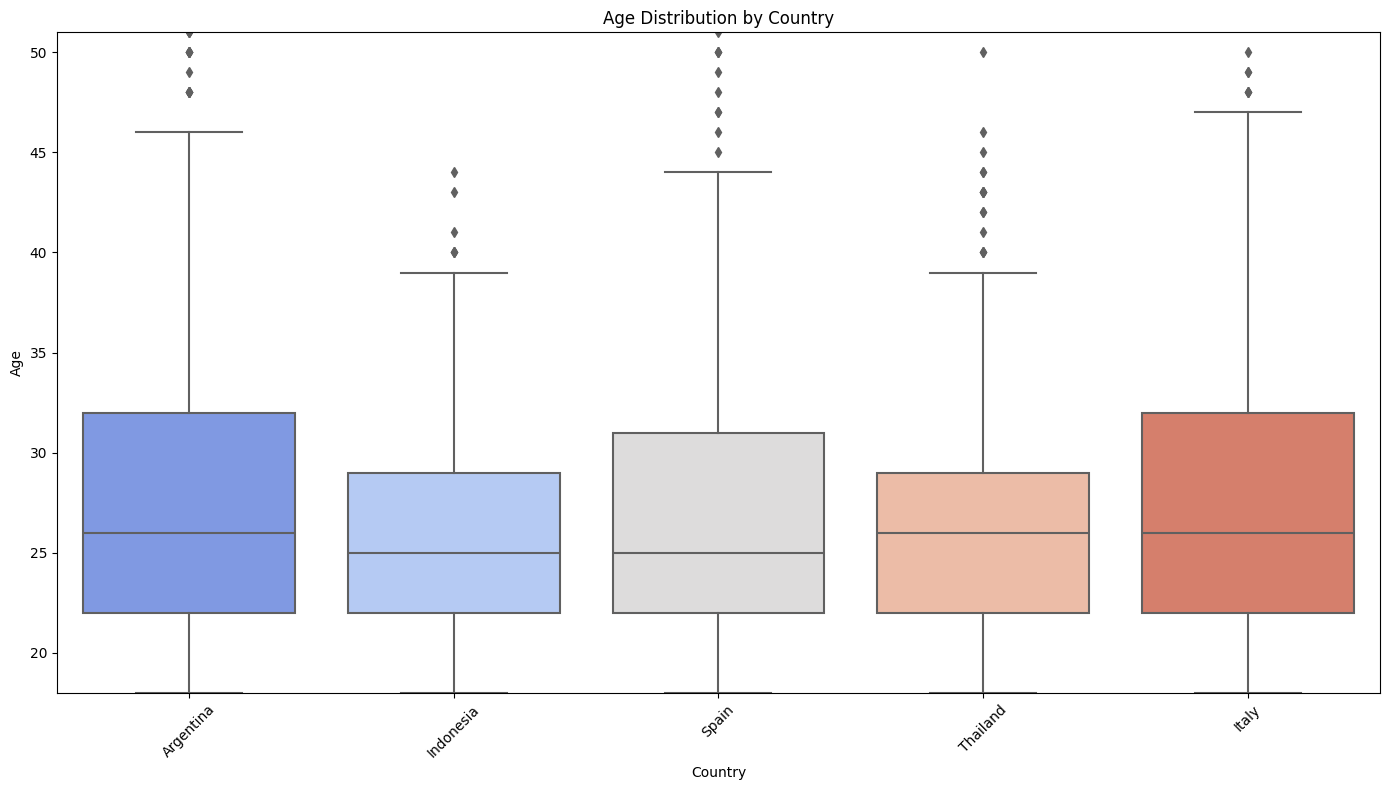

In [34]:
# Drop duplicate member_ids to ensure each member is only counted once.
df_unique_members = df_tinder_active.drop_duplicates(subset='member_id')

# Plot a boxplot of age distribution across different countries.
plt.figure(figsize=(14, 8))  
sns.boxplot(x='country', y='age', data=df_unique_members, palette='coolwarm')
plt.title('Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
matches_limits = df_unique_members['age'].quantile([0, 0.99]).values
plt.ylim(matches_limits)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [35]:
average_age_by_country_gender = df_unique_members.groupby(['country', 'gender'])['age'].mean().reset_index()

In [36]:
average_age_by_country_gender 

,country,gender,age
0,Argentina,Female,26.950249
1,Argentina,Male,29.510753
2,Indonesia,Female,25.438356
3,Indonesia,Male,26.530769
4,Italy,Female,26.801471
5,Italy,Male,28.393750
6,Spain,Female,26.521739
7,Spain,Male,27.961783
8,Thailand,Female,26.070968
9,Thailand,Male,27.089744


#### Average user age for males and females across countries

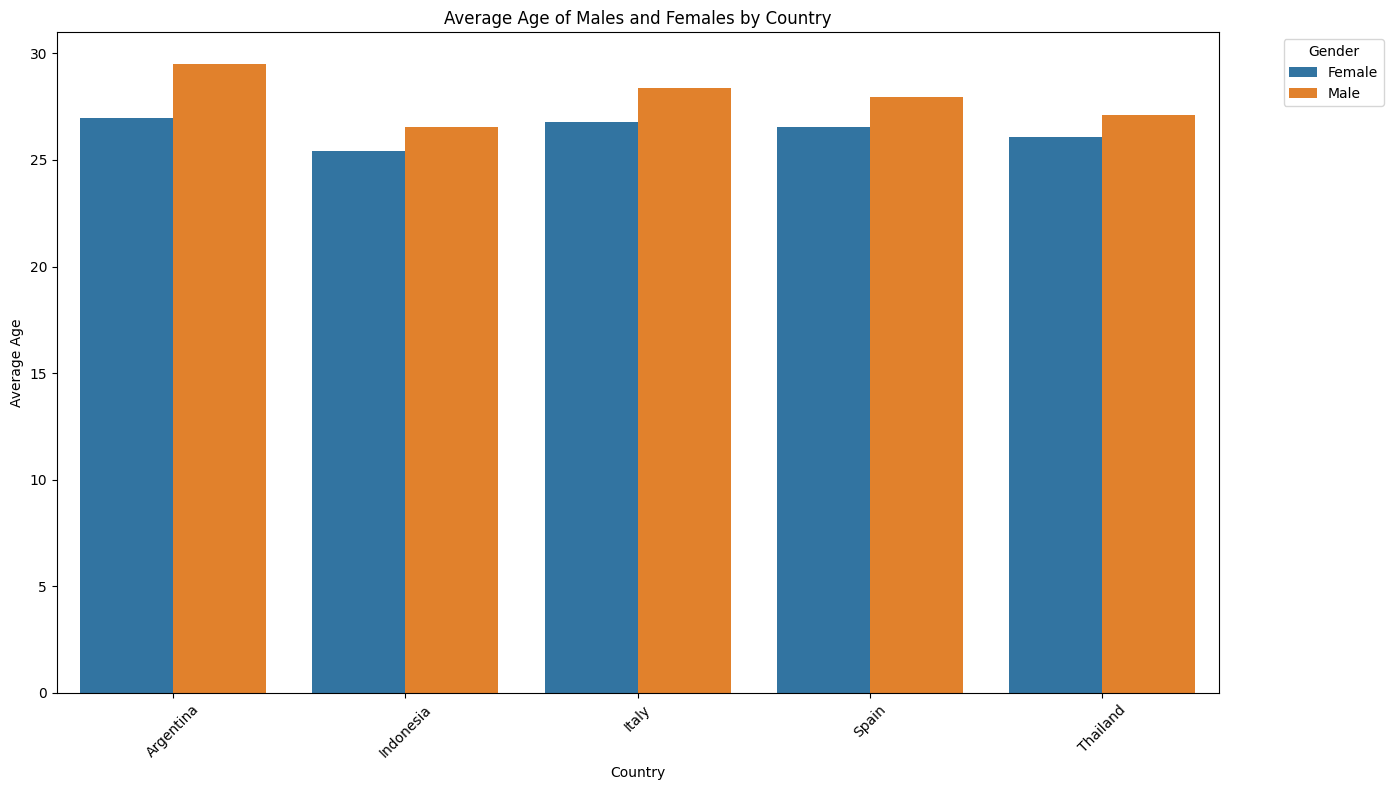

In [37]:
# Create the plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='country', 
    y='age', 
    hue='gender', 
    data=average_age_by_country_gender,

)

# Add title and labels
plt.title('Average Age of Males and Females by Country')
plt.xlabel('Country')
plt.ylabel('Average Age')
plt.xticks(rotation=45) 

# Place the legend outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout() 
plt.show()

#### Creating 2 more custom metrics and understanding user behaviour

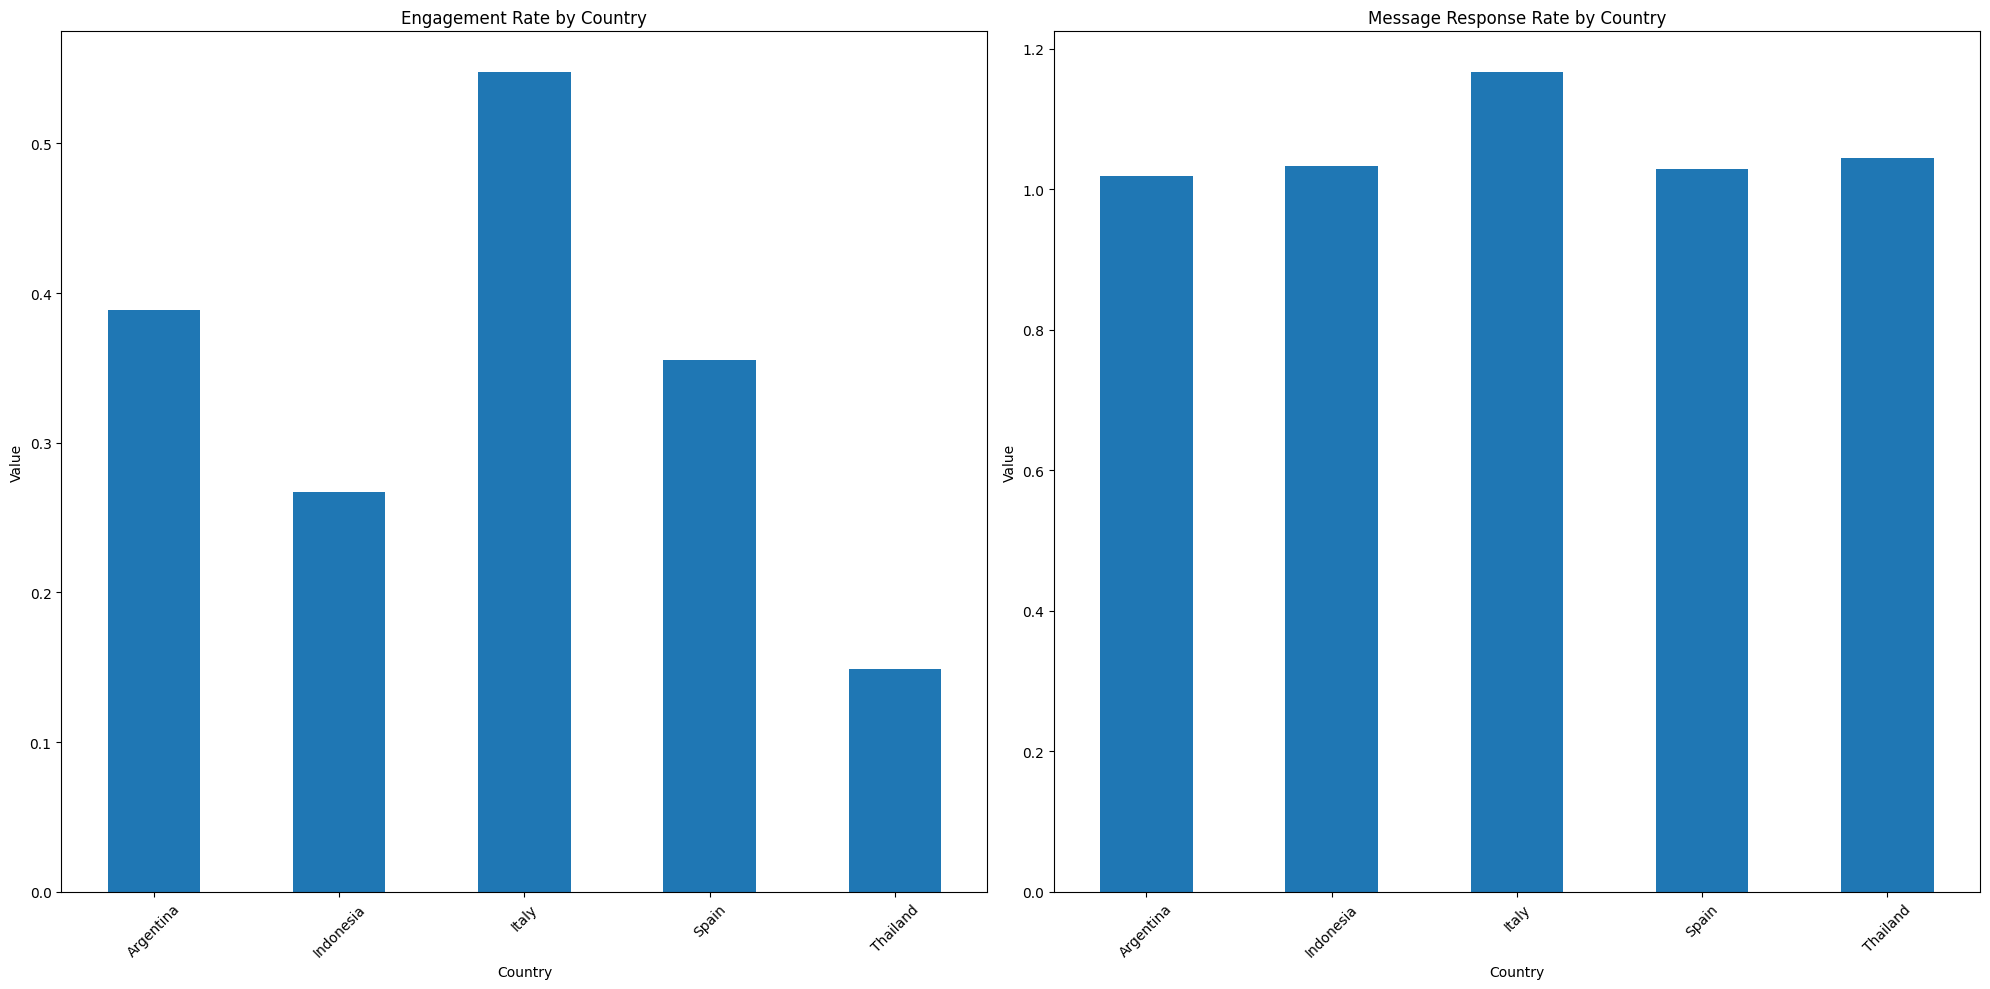

In [38]:
# Define a function to calculate our custom metrics
def calculate_custom_metrics(group):
    metrics = {
        'engagement_rate': group['likes_received'].sum() / group['swipes_sent'].sum(),
        'message_response_rate': group['messages_received'].sum() / group['messages_sent'].sum()
    }
    return pd.Series(metrics)

# Apply the function to each country group
metrics_by_country = df_tinder_active.groupby(['country']).apply(calculate_custom_metrics)


# Plotting some of these metrics as an example
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
metrics_by_country['engagement_rate'].plot(kind='bar', ax=axes[0], title='Engagement Rate by Country')
metrics_by_country['message_response_rate'].plot(kind='bar', ax=axes[1], title='Message Response Rate by Country')


# Add some labels and a tight layout
for ax in axes.flatten():
    ax.set_ylabel('Value')
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#### Dervive correlation of matches with all other variables in the dataset- answer what is impacting number of matches?

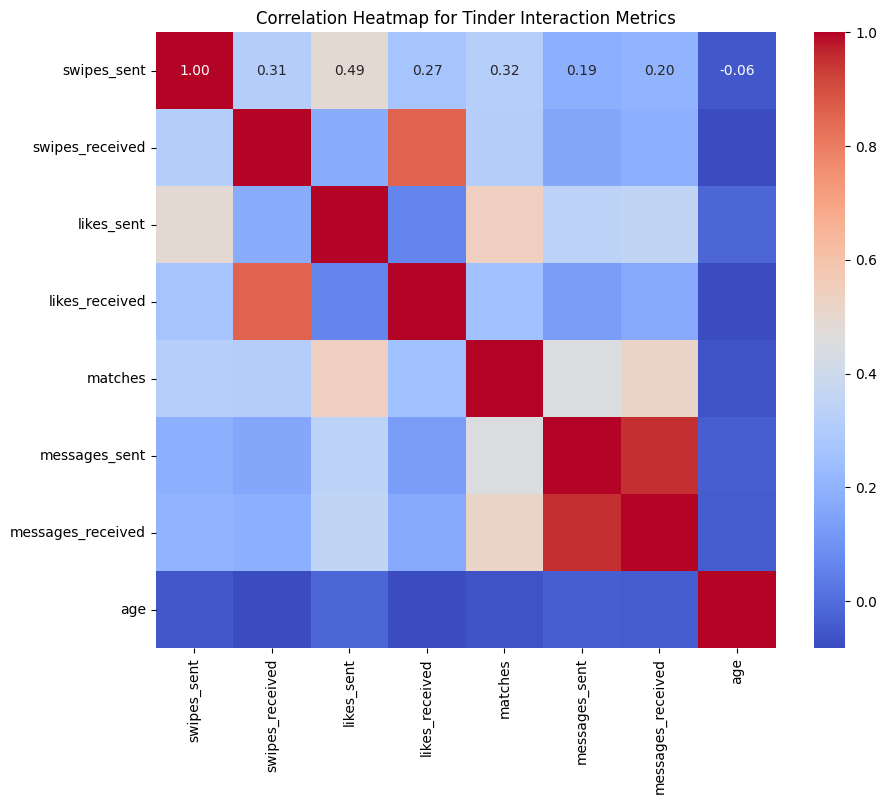

In [39]:
relevant_columns = [
    'swipes_sent', 'swipes_received', 'likes_sent', 'likes_received',
    'matches', 'messages_sent', 'messages_received','age'
]
active_users_metrics = df_tinder_active[relevant_columns]

# Calculate the correlation matrix for the selected metrics
correlation_matrix = active_users_metrics.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 10})
plt.title('Correlation Heatmap for Tinder Interaction Metrics')
plt.show()

In [40]:
correlation_matrix

,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received,age
swipes_sent,1.000000,0.313333,0.490899,0.265256,0.318068,0.191786,0.203746,-0.057093
swipes_received,0.313333,1.000000,0.177539,0.857542,0.312209,0.159177,0.187452,-0.081883
likes_sent,0.490899,0.177539,1.000000,0.061343,0.546801,0.338550,0.351271,-0.019157
likes_received,0.265256,0.857542,0.061343,1.000000,0.253790,0.129162,0.167804,-0.083089
matches,0.318068,0.312209,0.546801,0.253790,1.000000,0.448168,0.520842,-0.064745
messages_sent,0.191786,0.159177,0.338550,0.129162,0.448168,1.000000,0.951198,-0.037133
messages_received,0.203746,0.187452,0.351271,0.167804,0.520842,0.951198,1.000000,-0.043776
age,-0.057093,-0.081883,-0.019157,-0.083089,-0.064745,-0.037133,-0.043776,1.000000


#### Run a complete data regression with target variable as matches and all other relavant numeric columns
#### This is to check causality and test statistical significance of variables

In [41]:
X = df_tinder_active[['swipes_sent', 'swipes_received', 'likes_sent', 'likes_received', 'messages_sent', 'messages_received']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Define the dependent variable, which is what you're trying to predict
y = df_tinder_active['matches']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                matches   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3235.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:02:50   Log-Likelihood:                -60970.
No. Observations:               21487   AIC:                         1.220e+05
Df Residuals:                   21480   BIC:                         1.220e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0743      0.03

#### Run a gender-based regression with target variable as matches and all other relavant numeric columns(For Males)

In [42]:
df_tinder_active_men=df_tinder_active[df_tinder_active['gender']=='Male']
X = df_tinder_active_men[['swipes_sent', 'swipes_received', 'likes_sent', 'likes_received', 'messages_sent', 'messages_received']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Define the dependent variable, which is what you're trying to predict
y = df_tinder_active_men['matches']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                matches   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     2370.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:02:50   Log-Likelihood:                -38610.
No. Observations:               14088   AIC:                         7.723e+04
Df Residuals:                   14081   BIC:                         7.729e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1757      0.03

#### Run a gender-based regression with target variable as matches and all other relavant numeric columns(For Females)

In [43]:
df_tinder_active_female=df_tinder_active[df_tinder_active['gender']=='Female']
X = df_tinder_active_female[['swipes_sent', 'swipes_received', 'likes_sent', 'likes_received', 'messages_sent', 'messages_received','age']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Define the dependent variable, which is what you're trying to predict
y = df_tinder_active_female['matches']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                matches   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1405.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:02:51   Log-Likelihood:                -21064.
No. Observations:                7399   AIC:                         4.214e+04
Df Residuals:                    7391   BIC:                         4.220e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3862      0.19